In [1]:
from utils import data_path
import jax.numpy as np
from region_utils.shapes import ConvexPolygon
from region_utils.region import Domain, Subdomain

In [2]:
total_vertices = np.asarray(
    [
        [-1, 0],  # 0
        [-0.2, 0],  # 1
        [0.2, 0],  # 2
        [1, 0],  # 3
        [1, 1],  # 4
        [0.7, 1],  # 5
        [0.3, 1],  # 6
        [-1, 1],  # 7
    ]
)

region_idx = np.asarray([[1, 2, 5, 6], [2, 3, 4, 5], [0, 1, 6, 7]])
boundary_idx = [[0], [0], [0]]

regions_verts = total_vertices[region_idx]

Defining the regions

In [3]:
# First subdomain
subdomain0 = Subdomain(
    [ConvexPolygon(regions_verts[0], boundary_idx[0])],
)
subdomain1 = Subdomain(
    [ConvexPolygon(regions_verts[1], boundary_idx[1])],
)
subdomain2 = Subdomain(
    [ConvexPolygon(regions_verts[2], boundary_idx[2])],
)
domain = Domain([subdomain0, subdomain1, subdomain2])

In [4]:
domain.create_interior(2000, [-1, 0], [1, 1])
domain.create_boundary(200)
domain.create_interface(100, (0, 1), (total_vertices[2], total_vertices[5]))
domain.create_interface(100, (0, 2), (total_vertices[1], total_vertices[6]))

(415, 2)
(494, 2)
(1091, 2)


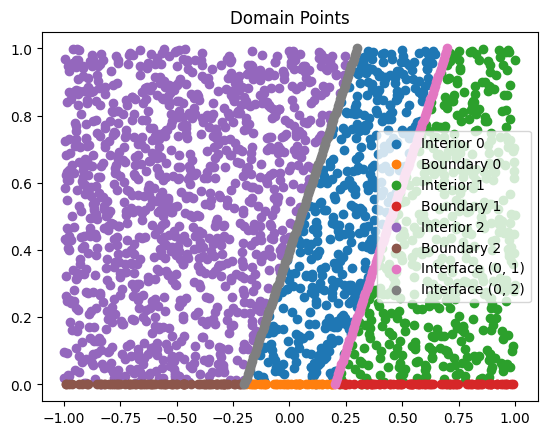

In [5]:
domain.plot()

In [6]:
domain.write_to_file(data_path / "train_advection.json")

domain.create_testing_data(1000, [-1, 0], [1, 1])
domain.write_to_file(data_path / "test_advection.json", train=False)

# Single domain for single PINN

In [7]:
total_vertices = np.asarray(
    [
        [-1, 0],  # 0
        [-0.2, 0],  # 1
        [0.2, 0],  # 2
        [1, 0],  # 3
        [1, 1],  # 4
        [0.7, 1],  # 5
        [0.3, 1],  # 6
        [-1, 1],  # 7
    ]
)

simple_region_idx = np.asarray([[0, 3, 4, 7]])
simple_boundary_idx = [[0]]

simple_regions_verts = total_vertices[simple_region_idx]

simple_subdomain = Subdomain(
    [ConvexPolygon(simple_regions_verts[0], simple_boundary_idx[0])],
)
simple_domain = Domain([simple_subdomain])

In [9]:
simple_subdomain.plot()

AttributeError: 'Subdomain' object has no attribute 'plot'